In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import model_from_json, Model
from keras import optimizers
import random

Using TensorFlow backend.


In [2]:
timestep = 0.1 #s
time = 5 #s
n = 3 # number of previous points to consider

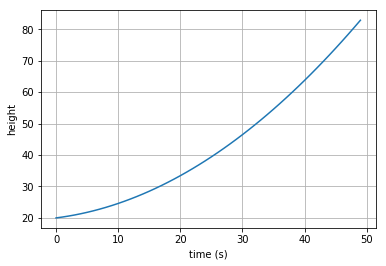

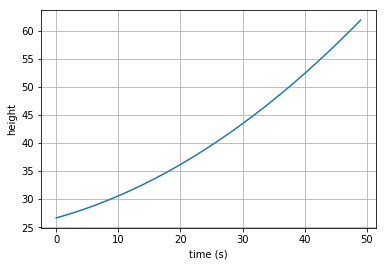

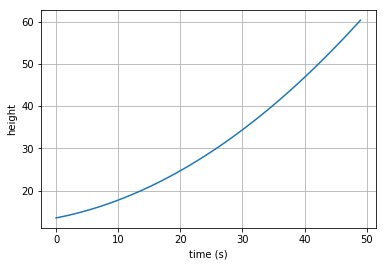

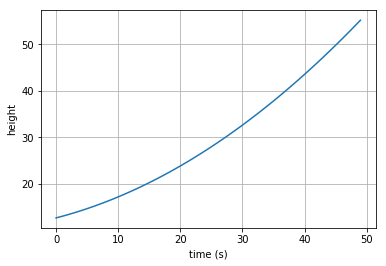

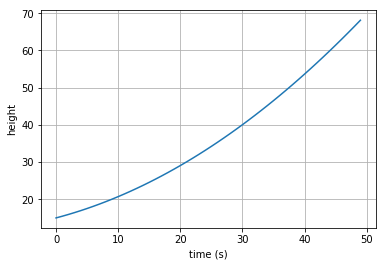

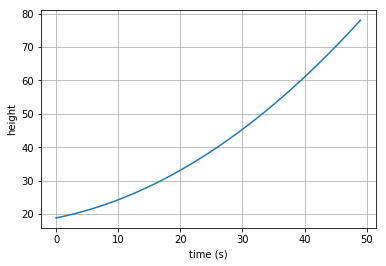

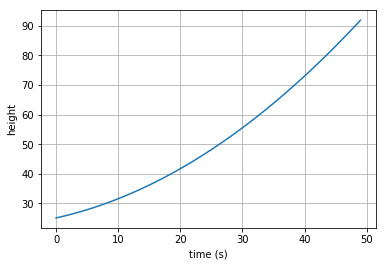

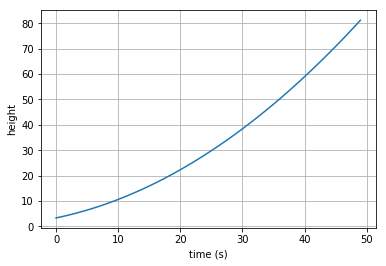

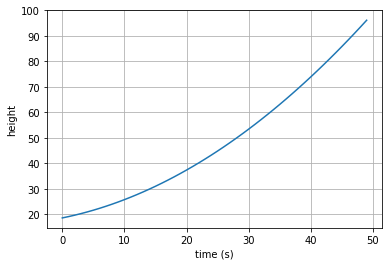

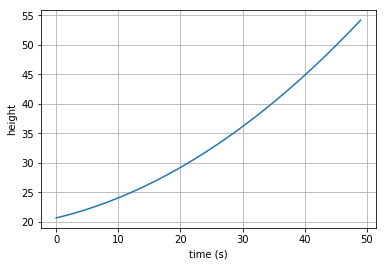

In [3]:
# generate training data
xtrain = []
ytrain = []
for variation in range(10):
    height_path = []
    height = random.uniform(1,30)
    velocity = random.uniform(2,5)
    acceleration = random.uniform(1,5)
    for t in range (int(time/timestep)):
        height_path.append(height)
        velocity += acceleration * timestep
        height += velocity * timestep 
        
    # plot
    fig, ax = plt.subplots()
    ax.plot(height_path)
    ax.set(xlabel='time (s)', ylabel='height')
    ax.grid()
    plt.show()
        
    # save data to training data
    for i in range(len(height_path) - n):
        xtrain.append(height_path[i : i + n])
        ytrain.append(height_path[i + n])
        
xtrain = np.array(xtrain)
ytrain = np.array(ytrain)

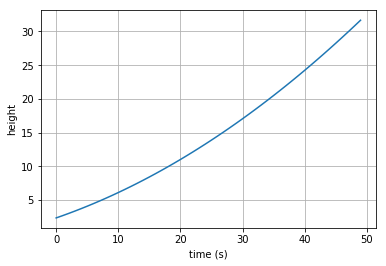

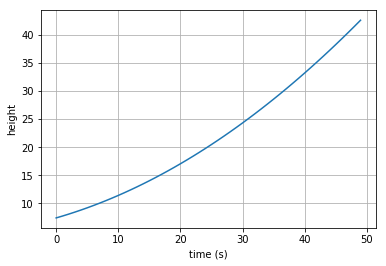

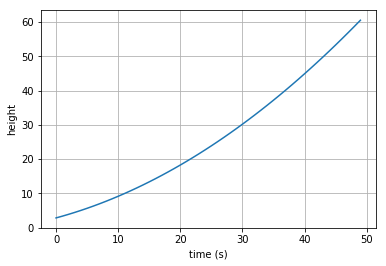

In [4]:
# generate training data
xtest = []
ytest = []
for variation in range(3):
    height_path = []
    height = random.uniform(1,10)
    velocity = random.uniform(2,5)
    acceleration = random.uniform(1,5)
    for t in range (int(time/timestep)):
        height_path.append(height)
        velocity += acceleration * timestep
        height += velocity * timestep 
        
    # plot
    fig, ax = plt.subplots()
    ax.plot(height_path)
    ax.set(xlabel='time (s)', ylabel='height')
    ax.grid()
    plt.show()        
    
    # save data to training data
    for i in range(len(height_path) - n):
        xtest.append(height_path[i : i + n])
        ytest.append(height_path[i + n])
        
xtest = np.array(xtest)
ytest = np.array(ytest)

In [19]:
input_layer = Input(shape=(n,))
matrix = Dense(1, activation = 'linear')
output = matrix(input_layer)
network = Model(input_layer, output)

# opt = optimizers.SGD(lr = 0.001, decay=0.05) # doesn't work, nan/inf error
network.compile(optimizer='rmsprop', loss='mean_squared_error')
matrix.set_weights([np.array([[1], [-3], [3]]),np.array([0.0])])

In [116]:
network.fit(xtrain, ytrain, epochs = 100, batch_size =10, shuffle = True, verbose = 2)

Epoch 1/100
 - 0s - loss: 0.0031
Epoch 2/100
 - 0s - loss: 0.0045
Epoch 3/100
 - 0s - loss: 0.0033
Epoch 4/100
 - 0s - loss: 0.0042
Epoch 5/100
 - 0s - loss: 0.0032
Epoch 6/100
 - 0s - loss: 0.0036
Epoch 7/100
 - 0s - loss: 0.0033
Epoch 8/100
 - 0s - loss: 0.0042
Epoch 9/100
 - 0s - loss: 0.0029
Epoch 10/100
 - 0s - loss: 0.0032
Epoch 11/100
 - 0s - loss: 0.0034
Epoch 12/100
 - 0s - loss: 0.0048
Epoch 13/100
 - 0s - loss: 0.0042
Epoch 14/100
 - 0s - loss: 0.0032
Epoch 15/100
 - 0s - loss: 0.0038
Epoch 16/100
 - 0s - loss: 0.0033
Epoch 17/100
 - 0s - loss: 0.0036
Epoch 18/100
 - 0s - loss: 0.0038
Epoch 19/100
 - 0s - loss: 0.0034
Epoch 20/100
 - 0s - loss: 0.0037
Epoch 21/100
 - 0s - loss: 0.0035
Epoch 22/100
 - 0s - loss: 0.0041
Epoch 23/100
 - 0s - loss: 0.0034
Epoch 24/100
 - 0s - loss: 0.0043
Epoch 25/100
 - 0s - loss: 0.0032
Epoch 26/100
 - 0s - loss: 0.0036
Epoch 27/100
 - 0s - loss: 0.0035
Epoch 28/100
 - 0s - loss: 0.0041
Epoch 29/100
 - 0s - loss: 0.0033
Epoch 30/100
 - 0s - lo

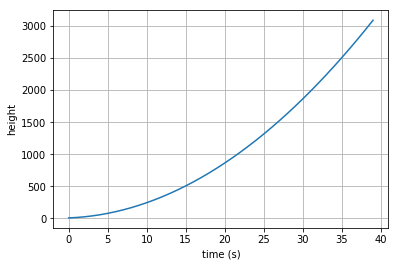

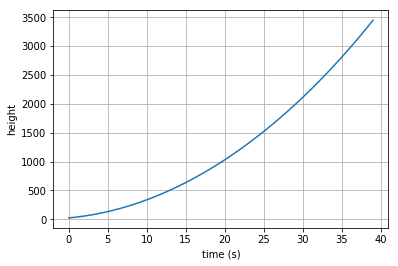

In [24]:
# generate and run test data

for variation in range(1):
    height_path = []
    height = random.uniform(1,10)
    velocity = random.uniform(2,5)
    acceleration = random.uniform(1,5)
    
    for t in range (int(time/timestep)):
        height_path.append(height)
        velocity += acceleration * timestep
        height += velocity * timestep 
        
    # plot
    fig, ax = plt.subplots()
    ax.plot(height_path)
    ax.set(xlabel='time (s)', ylabel='height')
    ax.grid()
    plt.show()        
    
    arr = height_path[:3]
    height_track = []
    
    for t in range (int(time/timestep)):
        height_track.append(arr[2])
        prediction = network.predict(np.array([arr,]))
        arr[:2] = arr[1:]
        arr[2] = prediction[0][0]
        
    # plot
    fig, ax = plt.subplots()
    ax.plot(height_track)
    ax.set(xlabel='time (s)', ylabel='height')
    ax.grid()
    plt.show()  

In [117]:
matrix.get_weights()

[array([[ 1.0001291],
        [-2.9999866],
        [ 2.9998958]], dtype=float32), array([0.00066679], dtype=float32)]

In [115]:
# generate one test

time = 100
timestep = 1
h = []
height = 0.0
velocity = 1.0
acceleration = 2.0
for t in range (int(time/timestep)):
    h.append(height)
    velocity += acceleration * timestep
    height += velocity * timestep 
arr = h[:3]
i = 0
print(h)

[0.0, 3.0, 8.0, 15.0, 24.0, 35.0, 48.0, 63.0, 80.0, 99.0, 120.0, 143.0, 168.0, 195.0, 224.0, 255.0, 288.0, 323.0, 360.0, 399.0, 440.0, 483.0, 528.0, 575.0, 624.0, 675.0, 728.0, 783.0, 840.0, 899.0, 960.0, 1023.0, 1088.0, 1155.0, 1224.0, 1295.0, 1368.0, 1443.0, 1520.0, 1599.0, 1680.0, 1763.0, 1848.0, 1935.0, 2024.0, 2115.0, 2208.0, 2303.0, 2400.0, 2499.0, 2600.0, 2703.0, 2808.0, 2915.0, 3024.0, 3135.0, 3248.0, 3363.0, 3480.0, 3599.0, 3720.0, 3843.0, 3968.0, 4095.0, 4224.0, 4355.0, 4488.0, 4623.0, 4760.0, 4899.0, 5040.0, 5183.0, 5328.0, 5475.0, 5624.0, 5775.0, 5928.0, 6083.0, 6240.0, 6399.0, 6560.0, 6723.0, 6888.0, 7055.0, 7224.0, 7395.0, 7568.0, 7743.0, 7920.0, 8099.0, 8280.0, 8463.0, 8648.0, 8835.0, 9024.0, 9215.0, 9408.0, 9603.0, 9800.0, 9999.0]


In [114]:
# update estimates iteratively
print(h[i+n], ' target')
i += 1
print(arr, ' input')
prediction = network.predict(np.array([arr,]))
arr[:2] = arr[1:]
arr[2] = prediction[0][0]
print(prediction, 'result')

7743.0  target
[8919.64, 9208.317, 9505.472]  input
[[9811.38]] result
